In [66]:
import os
os.environ["PATH"] += os.pathsep + f'C:/Program Files (x86)/Graphviz2.38/bin'

In [67]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Import libraries
from fastai.imports import *
from fastai.structured import  *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

PATH='Data/'

prices = pd.read_csv(f'{PATH}/prices.csv', parse_dates=['Date'],
                     low_memory=False, header=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
prices.columns = prices.columns.str.replace("-","_")

In [69]:
prices.dtypes

Date                               datetime64[ns]
BOLSAA_Price                              float64
Bovespa_Brazil_50_Price                   float64
CAD_USD_Price                             float64
Canada_10Y_BY_Price                       float64
Canada_30Y_BY_Price                       float64
EUR_USD_Price                             float64
Euro_Stoxx_50_Price                       float64
JPY_USD_Price                             float64
Nikkei_225_Price                          float64
Shanghai_Shenzhen_CSI_300_Price           float64
SnP_TSX_Composite_Price                   float64
SnP_500_Price                             float64
US_10Y_BY_Price                           float64
US_30Y_BY.csv_Price                       float64
Holiday                                      bool
weekend                                      bool
month                                      object
quarter                                    object
dtype: object

In [70]:
add_datepart(prices, "Date", drop=False)
train_cats(prices)

for name, series in prices.items():
    if(is_string_dtype(series.dtype)):
        print(name, prices[name].cat.categories)

month Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')
quarter Index(['Q1', 'Q2', 'Q3', 'Q4'], dtype='object')


In [71]:
prices.shape

(1744, 32)

In [72]:
prices.columns

Index(['Date', 'BOLSAA_Price', 'Bovespa_Brazil_50_Price', 'CAD_USD_Price',
       'Canada_10Y_BY_Price', 'Canada_30Y_BY_Price', 'EUR_USD_Price',
       'Euro_Stoxx_50_Price', 'JPY_USD_Price', 'Nikkei_225_Price',
       'Shanghai_Shenzhen_CSI_300_Price', 'SnP_TSX_Composite_Price',
       'SnP_500_Price', 'US_10Y_BY_Price', 'US_30Y_BY.csv_Price', 'Holiday',
       'weekend', 'month', 'quarter', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed'],
      dtype='object')

In [73]:
prices.isnull().sum().sort_index()

BOLSAA_Price                       0
Bovespa_Brazil_50_Price            0
CAD_USD_Price                      0
Canada_10Y_BY_Price                0
Canada_30Y_BY_Price                0
Date                               0
Day                                0
Dayofweek                          0
Dayofyear                          0
EUR_USD_Price                      0
Elapsed                            0
Euro_Stoxx_50_Price                0
Holiday                            0
Is_month_end                       0
Is_month_start                     0
Is_quarter_end                     0
Is_quarter_start                   0
Is_year_end                        0
Is_year_start                      0
JPY_USD_Price                      0
Month                              0
Nikkei_225_Price                   0
Shanghai_Shenzhen_CSI_300_Price    0
SnP_500_Price                      0
SnP_TSX_Composite_Price            0
US_10Y_BY_Price                    0
US_30Y_BY.csv_Price                0
W

In [74]:
#prices.reset_index(inplace=True)

In [75]:
date = prices.Date.copy()

In [76]:
prices.drop('Date', axis=1, inplace=True)

In [77]:
prices, y, nas= proc_df(prices)

In [78]:
prices.isnull().sum().sort_index()

BOLSAA_Price                       0
Bovespa_Brazil_50_Price            0
CAD_USD_Price                      0
Canada_10Y_BY_Price                0
Canada_30Y_BY_Price                0
Day                                0
Dayofweek                          0
Dayofyear                          0
EUR_USD_Price                      0
Elapsed                            0
Euro_Stoxx_50_Price                0
Holiday                            0
Is_month_end                       0
Is_month_start                     0
Is_quarter_end                     0
Is_quarter_start                   0
Is_year_end                        0
Is_year_start                      0
JPY_USD_Price                      0
Month                              0
Nikkei_225_Price                   0
Shanghai_Shenzhen_CSI_300_Price    0
SnP_500_Price                      0
SnP_TSX_Composite_Price            0
US_10Y_BY_Price                    0
US_30Y_BY.csv_Price                0
Week                               0
Y

In [79]:
os.makedirs('tmp',exist_ok=True)
prices.to_feather('tmp/prices')

In [80]:
prices.head().T

,0,1,2,3,4
BOLSAA_Price,31.68,32.06,32.17,32.88,32.8
Bovespa_Brazil_50_Price,13880.5,13742.5,13964.1,14056.1,14550.3
CAD_USD_Price,0.7803,0.7827,0.7763,0.7809,0.7821
Canada_10Y_BY_Price,2.516,2.516,2.486,2.52,2.501
Canada_30Y_BY_Price,2.501,2.501,2.496,2.528,2.512
EUR_USD_Price,1.1788,1.179,1.1778,1.1795,1.1807
Euro_Stoxx_50_Price,3587.25,3572.57,3573.76,3592.18,3562.85
JPY_USD_Price,0.00903,0.00901,0.00903,0.00902,0.00906
Nikkei_225_Price,22960.3,23002.4,22930.4,22838.4,22717.2
Shanghai_Shenzhen_CSI_300_Price,3906.21,3921.24,3903.06,3864.05,3892.84


In [81]:
prices_R = prices.iloc[::-1]

In [82]:
#df_raw, y, nas = proc_df(prices, 'CAD-USD_Price')
def create_feature_var(df, name):
    if len(df[name]):
        df_raw, y, nas = proc_df(prices, name)
    else:
        df_raw, y, nas = None, None, None
    return df_raw, y, nas

In [83]:
train_index = round(len(prices)*0.7)

In [84]:
dataframe, target, nas = create_feature_var(prices_R, 'CAD_USD_Price')

In [85]:
def split_df(df, train_index): 
    return df[:train_index].copy(), df[train_index:].copy()

x_train, x_test = split_df(dataframe, train_index)
y_train, y_test = split_df(target, train_index)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1221, 30), (523, 30), (1221,), (523,))

In [86]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(model):
    res = [rmse(model.predict(x_train), y_train), 
           #rmse(model.predict(x_test), y_test),
           model.score(x_train, y_train)] 
           #model.score(x_test, y_test)]
    if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
    print(res)

In [87]:
set_rf_samples(1000)
m = RandomForestRegressor(n_jobs=-1,oob_score=True, min_samples_leaf=5, max_features=0.5, max_depth=3)
%time m.fit(dataframe, target)
print_score(m)

/home/rk/miniconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 62.5 ms, sys: 46.9 ms, total: 109 ms
Wall time: 150 ms
[0.015030871249101864, 0.9558685088092238, 0.9465367350874693]


In [88]:
draw_tree(m.estimators_[0], dataframe, precision=3)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [101]:
fi = rf_feat_importance(m, x_train)
fi.shape

(30, 2)

In [90]:
preds = np.stack([t.predict(x_test) for t in m.estimators_])
print(np.mean(preds[:,100]), np.std(preds[:,100]), y_test[100])
print(np.mean(preds[:,10]), np.std(preds[:,10]), y_test[10])
print(np.mean(preds[:,0]), np.std(preds[:,0]), y_test[0])

0.9759559422253371 0.011990528376543361 0.9893
0.9655859029689535 0.0041399629235524165 0.9675
0.9655859029689535 0.0041399629235524165 0.9490000000000001


In [102]:
fi_np = np.array(fi)

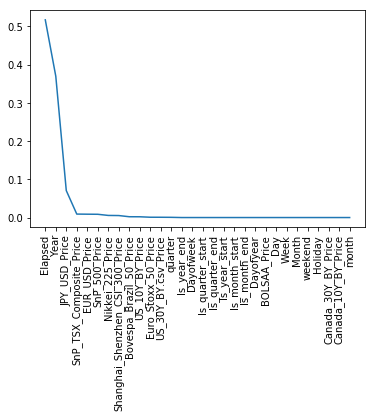

In [103]:
plt.plot(fi_np[:,0], fi_np[:,1]);
plt.xticks(rotation=90);

In [104]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

8

In [47]:
df_keep = dataframe[to_keep].copy()
x_train, x_test = split_df(df_keep, train_index)

In [48]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(x_train, y_train)
print_score(m)

[0.003238173738772117, 0.9979517612147193]


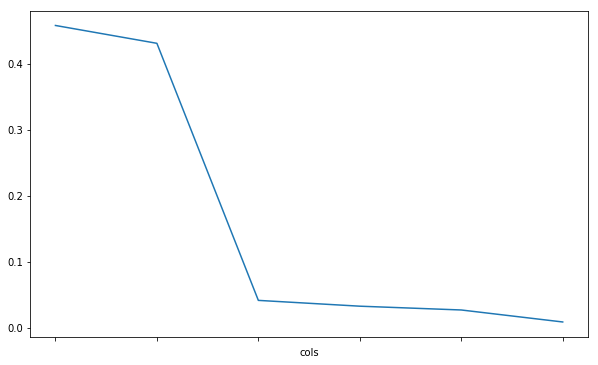

In [49]:
fi = rf_feat_importance(m, df_keep)
fi.plot('cols', 'imp', figsize=(10,6), legend=False);